<a href="https://colab.research.google.com/github/Kilvia/tf-data-handle/blob/main/TF_data_handle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # TensorFlow Input Data Handling

Handling data well in data science is the basis of the basics. This is the same when learning Tensorflow.

It is important to be well aware of techniques that can process data well and efficiently. In order to cultivate this ability, this practice will introduce Tensorflow's data-related APIs. There are several related APIs, but the practice will cover the API below.
- Keras data API
- Keras preprocess API
- Tensorflow data API

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
import ssl
from sklearn import model_selection

In [2]:
requests.packages.urllib3.disable_warnings()

In [3]:
try:
  _create_unverified_https_context = ssl._create_default_https_context
except AttributeError:
  pass
else:
  ssl._create_default_https_context = _create_unverified_https_context

### Keras dataset

Keras provides small datasets that are commonly used, and can be received as numpy arrays through load_data(). Some examples are:

* boston_housing module: Boston housing price regression dataset.
* cifar10 module: CIFAR10 small images classification dataset.
* cifar100 module: CIFAR100 small images classification dataset.
* fashion_mnist module: Fashion-MNIST dataset.
* imdb module: IMDB sentiment classification dataset.
* mnist module: MNIST handwritten digits dataset.
* reuters module: Reuters topic classification dataset.

In [4]:
cifar10 = tf.keras.datasets.cifar10

# Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split train set into train and valid
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.2)


170498071/170498071 [==============================] - 2s 0us/step


## Data preprocessing/augmentation using Keras layers



In [5]:
data_aug = tf.keras.Sequential([
    # Convert data from integers between 0-255 into real numbers between 0-1
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0),
    # Up/down/left/right (random flip)
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    # Rotation (2pi * 20%) (RandomRotation)
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

### Model

In [6]:
model = tf.keras.models.Sequential(([
    data_aug,
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
]))

Alternatively, the data may be configured to be processed in the following manner without being included in the model.

In [7]:
print(x_train.shape)
# Data preprocessing/augmentation for training image
x_train = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_train)
x_train = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical')(x_train)
x_train = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)(x_train)

# Data preprocessing/augmentation for validation/test image
x_valid = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_valid)
x_test = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(x_valid)

(40000, 32, 32, 3)


### Image Data Generator

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    vertical_flip = True,
    # Degree
    rotation_range = 72
)

In [10]:
batch_x, batch_y = next(datagen.flow(x_train, y_train, batch_size=32, shuffle=True))
print(batch_x.shape)
print(batch_y.shape)

(32, 32, 32, 3)
(32, 1)


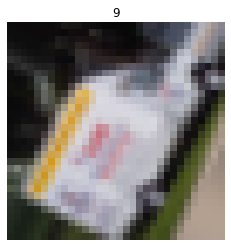

In [11]:
# Visualize single data
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label[0])
  plt.axis('off')

show(batch_x[0], batch_y[0])

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])

Training

In [14]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)


Epoch 1/10
1562/1562 [==============================] - 232s 148ms/step - loss: 1.7713 - accuracy: 0.1099
Epoch 2/10
1562/1562 [==============================] - 234s 150ms/step - loss: 1.5620 - accuracy: 0.1045
Epoch 3/10
1562/1562 [==============================] - 233s 149ms/step - loss: 1.4773 - accuracy: 0.1063
Epoch 4/10
1562/1562 [==============================] - 233s 149ms/step - loss: 1.4213 - accuracy: 0.1053
Epoch 5/10
1562/1562 [==============================] - 234s 150ms/step - loss: 1.3762 - accuracy: 0.1037
Epoch 6/10
1562/1562 [==============================] - 231s 148ms/step - loss: 1.3355 - accuracy: 0.1035
Epoch 7/10
1562/1562 [==============================] - 291s 186ms/step - loss: 1.3100 - accuracy: 0.1033
Epoch 8/10
1562/1562 [==============================] - 297s 190ms/step - loss: 1.2827 - accuracy: 0.1026
Epoch 9/10
1562/1562 [==============================] - 255s 163ms/step - loss: 1.2656 - accuracy: 0.1033
Epoch 10/10
1562/1562 [=======================

## Tensorflow data API

Although Keras' data API introduced above is easy to use, it is insufficient to make detailed adjustments. The Tensorflow data API not only allows more detailed data processing, but is also efficient in configuring data pipelines. This can make a lot of difference in training using large amounts of data.

In [15]:
pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import tensorflow_datasets as tfds

In [19]:
# Load cifar10 dataset
(dataset_train, dataset_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files = True,
    as_supervised = True,
    with_info = True
)

# The data set is split int train/test dataset
# Split the trainset into train/valid dataset
train_size = int(ds_info.splits['train'].num_examples * 0.8)
val_size = ds_info.splits['train'].num_examples - train_size

# Retrieve train_size data as new training data using take
ds_train = dataset_train.take(train_size)

# To retrieve the remaining data as validation data using skip
ds_val = dataset_train.skip(train_size)

In [21]:
def normalize_img(image, label):
  return tf.cast( image, tf.float32) / 255.0, label

ds_train = ds_train.map(
    normalize_img,
    num_parallel_calls = tf.data.experimental.AUTOTUNE
)

In [23]:
import scipy.ndimage as ndimage

def random_rotate(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image


def tf_random_rotate(image, label):
  im_shape = image.shape
  [image] = tf.py_function(random_rotate, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

ds_train = ds_train.map(
    tf_random_rotate, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [26]:
def vertical_slip(image):
  image = np.flipud(image)
  return image

def tf_vertical_flip(image, label):
  im_shape = image.shape
  image.set_shape(im_shape)
  return image, label

ds_train = ds_train.map(
    tf_vertical_flip,
    num_parallel_calls=tf.data.experimental.AUTOTUNE
    # Not available in tf 2.1.deterministic=False
)

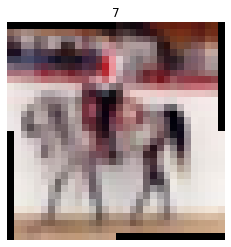

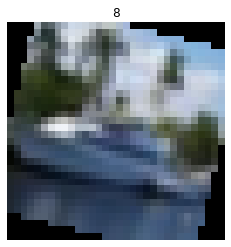

In [27]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')

for image, label in ds_train.take(2):
  show(image, label)

When the size of the data is large, the training speed can be improved by using an appropriate method according to the situation. 

In [29]:
# Cache the data, if it fits in memory
# ds_train = ds_train.cache()

# If possible, set buffer size same as the full number of data
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

# Set the batch size
ds_train = ds_train.batch(32)

# Prefetch data for performance
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [30]:
model.fit(ds_train, epochs=1)


1250/1250 [==============================] - 231s 143ms/step - loss: 1.0643 - accuracy: 0.1044


## Create Tensorflow Dataset from File

In [31]:
import pathlib
flowers_root = tf.keras.utils.get_file(
    "flower_photos",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    untar = True
)

# The path of data folder
flowers_root = pathlib.Path(flowers_root)

228813984/228813984 [==============================] - 2s 0us/step


In [33]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_root,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (180, 180)
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_root,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (180, 180)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [34]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [35]:
import os

def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)

  label_dict = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
  # Get label from folder name
  label = parts[-2] == label_dict

  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [180, 180])

  return image, label

images_ds = list_ds.map(parse_image) 

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


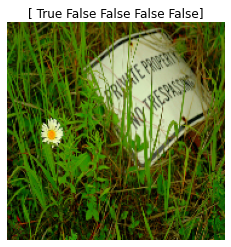

In [36]:
for image, label in images_ds.take(1):
  show(image, label)